In [1]:
import numpy as np
import matplotlib.pyplot as plt

#lagrange rút gọn 

In [19]:
def lagrange_coeffs(x, y):
    n = len(x)
    # Khởi tạo mảng hệ số cuối cùng với zeros
    coeffs_final = np.zeros(n)
    
    # Tính hệ số cho mỗi đa thức Lagrange
    for i in range(n):
        # Khởi tạo mảng hệ số tạm thời cho đa thức Lagrange hiện tại
        temp_coeffs = np.array([y[i]])
        
        for j in range(n):
            if i != j:
                # Tạo mảng hệ số cho (x - x[j])
                denom = x[i] - x[j]
                poly_coeffs = np.array([-x[j] / denom, 1 / denom])
                
                # Nhân đa thức hiện tại với (x - x[j])
                temp_coeffs = np.polynomial.polynomial.polymul(temp_coeffs, poly_coeffs)
        
        # Cộng dồn vào hệ số cuối cùng
        coeffs_final = np.polynomial.polynomial.polyadd(coeffs_final, temp_coeffs)
    
    # Đảo ngược mảng hệ số để phù hợp với định dạng thông thường
    return coeffs_final[::]

In [20]:
t_sample = np.array([1, 2, 3, 4, 7])
y_sample = np.array([17, 17.5, 76, 210.5, 1970])

Hệ số của đa thức nội suy Lagrange: [ 104.5 -153.5   81.   -17.     2. ]


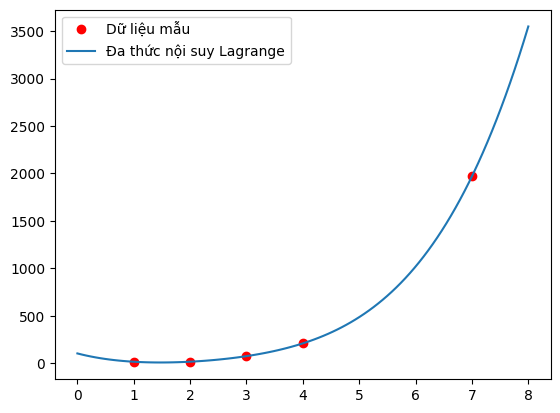

In [22]:
# Tính hệ số của đa thức nội suy Lagrange
coeffs = lagrange_coeffs(t_sample, y_sample)

print("Hệ số của đa thức nội suy Lagrange:", coeffs)
# vẽ 
t = np.linspace(0, 8, 100)
y = np.polynomial.polynomial.polyval(t, coeffs)
plt.plot(t_sample, y_sample, 'ro', label='Dữ liệu mẫu')
plt.plot(t, y, label='Đa thức nội suy Lagrange')
plt.legend()
plt.show()


Newton rút gọn

In [1]:

def proterm(i, x): 
	pro = np.array([1.0]) 
	for j in range(i): 
		pro = np.polynomial.polynomial.polymul(pro, np.array([- x[j], 1])) 
	return pro 

# Function for calculating 
# divided difference table 
def dividedDiffTable(x, y, n):

	for i in range(1, n): 
		for j in range(n - i): 
			y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) / (x[j] - x[i + j]))
	return y

# Function for applying Newton's 
# divided difference formula 
def applyFormula( x, y, n): 

	poly = np.array([y[0][0]])

	for i in range(1, n):
		print(poly)
		poly = np.polynomial.polynomial.polyadd(poly, (proterm(i, x) * y[0][i]))
	
	return poly 

def printDiffTable(y, n): 

	for i in range(n): 
		for j in range(n - i): 
			print(round(y[i][j], 4), "\t", end = " ") 

		print("") 
 




In [41]:
# chuẩn bị dữ liệu cho nội suy newton mốc bất kì
t_sample = np.array([1, 2, 3, 4, 7])
y_sample = np.array([17, 17.5, 76, 210.5, 1970])

# Chuyển đổi sang dạng x và y như trong ví dụ ban đầu
n = len(t_sample)  # Số lượng input
x = t_sample.tolist()  # Chuyển đổi t_sample thành list cho x

# Khởi tạo mảng y với giá trị 0
y = [[0 for i in range(n)] for j in range(n)]

# Điền giá trị vào y[i][0] từ y_sample
for i in range(n):
    y[i][0] = y_sample[i]

x: [1, 2, 3, 4, 7]
y: [[17.0, 0, 0, 0, 0], [17.5, 0, 0, 0, 0], [76.0, 0, 0, 0, 0], [210.5, 0, 0, 0, 0], [1970.0, 0, 0, 0, 0]]


In [42]:
# calculating divided difference table 
y=dividedDiffTable(x, y, n) 

# displaying divided difference table 
printDiffTable(y, n) 
applyFormula(x, y, n)

17.0 	 0.5 	 29.0 	 3.0 	 2.0 	 
17.5 	 58.5 	 38.0 	 15.0 	 
76.0 	 134.5 	 113.0 	 
210.5 	 586.5 	 
1970.0 	 
[17.]
[16.5  0.5]
[ 74.5 -86.5  29. ]
[ 56.5 -53.5  11.    3. ]


array([ 104.5, -153.5,   81. ,  -17. ,    2. ])

newton mốc cách đều

In [47]:
# Python3 Program to interpolate using 
# newton forward interpolation

# calculating u mentioned in the formula
def u_cal(u, n):

	temp = u
	for i in range(1, n):
		temp = temp * (u - i)
	return temp

# calculating factorial of given number n
def fact(n):
	f = 1
	for i in range(2, n + 1):
		f *= i
	return f

# Driver Code

# Number of values given
n = 5
x = [ 45, 50, 55, 60, 65]
	
# y[][] is used for difference table
# with y[][0] used for input
y = [[0 for i in range(n)]
		for j in range(n)]
y[0][0] = 0.7071
y[1][0] = 0.7660
y[2][0] = 0.8192
y[3][0] = 0.8660
y[4][0] = 0.9063

# Calculating the forward difference
# table
for i in range(1, n):
	for j in range(n - i):
		y[j][i] = y[j + 1][i - 1] - y[j][i - 1]

# Displaying the forward difference table
for i in range(n):
	print(x[i], end = "\t")
	for j in range(n - i):
		print(y[i][j], end = "\t")
	print("")

# Value to interpolate at
value = 52

# initializing u and sum
sum = y[0][0]
u = (value - x[0]) / (x[1] - x[0])
for i in range(1,n):
	sum = sum + (u_cal(u, i) * y[0][i]) / fact(i)

print("\nValue at", value, 
	"is", round(sum, 6))



45	0.7071	0.05890000000000006	-0.005700000000000038	-0.0007000000000000339	0.000600000000000156	
50	0.766	0.053200000000000025	-0.006400000000000072	-9.999999999987796e-05	
55	0.8192	0.04679999999999995	-0.00649999999999995	
60	0.866	0.0403	
65	0.9063	

Value at 52 is 0.788017


In [48]:
# Python3 Program to interpolate using
# newton backward interpolation

# Calculation of u mentioned in formula
def u_cal(u, n):
	temp = u
	for i in range(n):
		temp = temp * (u + i)
	return temp

# Calculating factorial of given n
def fact(n):
	f = 1
	for i in range(2, n + 1):
		f *= i
	return f


# Driver code


# number of values given
n = 5
x = [1891, 1901, 1911, 1921, 1931]

# y is used for difference
# table and y[0] used for input
y = [[0.0 for _ in range(n)] for __ in range(n)]
y[0][0] = 46
y[1][0] = 66
y[2][0] = 81
y[3][0] = 93
y[4][0] = 101

# Calculating the backward difference table
for i in range(1, n):
	for j in range(n - 1, i - 1, -1):
		y[j][i] = y[j][i - 1] - y[j - 1][i - 1]


# Displaying the backward difference table
for i in range(n):
	for j in range(i + 1):
		print(y[i][j], end="\t")
	print()

# Value to interpolate at
value = 1925

# Initializing u and sum
sum = y[n - 1][0]
u = (value - x[n - 1]) / (x[1] - x[0])
for i in range(1, n):
	sum = sum + (u_cal(u, i) * y[n - 1][i]) / fact(i)

print("\n Value at", value, "is", sum)


# This code is contributed by phasing17


46	
66	20	
81	15	-5	
93	12	-3	2	
101	8	-4	-1	-3	

 Value at 1925 is 103.49792
